# Tek Değişkenli Aykırı Gözlem Analizi

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds') 
df = diamonds.copy()
df = df.select_dtypes(include = ['float64', 'int64']) 
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_table = df["table"].copy()

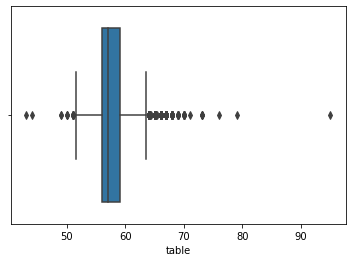

In [4]:
sns.boxplot(x = df_table)

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1- 1.5*IQR
alt_sinir

ust_sinir = Q3 + 1.5*IQR
ust_sinir

63.5

In [6]:
(df_table < (alt_sinir)) | (df_table > (ust_sinir))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [7]:
df_table < (alt_sinir)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [8]:
aykiri_tf = df_table < (alt_sinir)

In [9]:
aykiri_tf[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [10]:
aykirilar = df_table[aykiri_tf]
aykirilar.index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

# Aykırı Değer Probleminin Çözülmesi

In [11]:
import pandas as pd

In [12]:
df_table.head()
type(df_table)
df_table.shape

(53940,)

In [17]:
temiz_df_table = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]


ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [14]:
temiz_df_table.shape

NameError: name 'temiz_df_table' is not defined

In [ ]:
df_table = df["table"].copy()

In [ ]:
sns.boxplot(x = df_table)

In [ ]:
df_table[aykiri_tf]

In [ ]:
df_table.mean()

In [ ]:
df_table[aykiri_tf] = df_table.mean()

In [ ]:
df_table[aykiri_tf]

In [ ]:
aykiri_tf = (df_table < (alt_sinir)) | (df_table > (ust_sinir))

In [ ]:
df_table[aykiri_tf].head()

In [ ]:
df_table.describe()

In [ ]:
df_table[aykiri_tf] = df_table.mean()

In [ ]:
df_table.describe()

In [ ]:
df_table = df["table"].copy()

In [ ]:
aykiri_tf = df_table < (alt_sinir)

In [ ]:
df_table[aykiri_tf]

In [ ]:
df_table[aykiri_tf] = alt_sinir 

In [ ]:
df_table[aykiri_tf]

# Çok Değişkenli Aykırı Gözlem Analizi

## Local Outlier Factor

In [ ]:
from IPython.display import Image
Image(filename =  "lof_intuition.png" , width=400, height=400)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers = np.random.normal(70, 3, (100, 2))

X_inliers = np.r_[X_inliers + 10, X_inliers - 10] 

print(X_inliers.shape)
print(X_inliers[:3,:2])

In [ ]:
X_outliers = np.random.uniform(low=15, high=130, size=(20, 2))

In [ ]:
X_outliers

In [ ]:
X = np.r_[X_inliers, X_outliers]

In [ ]:
X[0:3,:]

In [ ]:
LOF = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [ ]:
LOF.fit_predict(X)

In [ ]:
X_score = LOF.negative_outlier_factor_

In [ ]:
X_score[0:3]

In [ ]:
X_score.mean()

In [ ]:
X_score.std()

In [ ]:
np.sort(X_score)[0:10]

In [ ]:
plt.hist(X_score, bins = "auto", density = True)
plt.show

In [ ]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

In [ ]:
radius = radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

In [ ]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

plt.scatter(X[:, 0], X[:, 1], s = 1000 * radius, edgecolors='r', 
            facecolors='none',label='LOF Skorları')

plt.xlim((10,100))
plt.ylim((10,100))

legend = plt.legend(loc = "upper left")

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]

In [ ]:
X[0:3]

In [ ]:
np.sort(X_score)[0:9]

In [ ]:
esik_deger = np.sort(X_score)[9]
esik_deger

In [ ]:
(X_score > esik_deger)[200:220]

In [ ]:
tf_vektor = (X_score > esik_deger)

In [ ]:
X[X_score < esik_deger]

In [ ]:
X[~tf_vektor]

In [ ]:
X[X_score < esik_deger]

In [ ]:
X[200:220]

# Aykırı Gözlem Problemini Çözmek

In [ ]:
df = X[X_score > esik_deger]

In [ ]:
df[0:10]

In [ ]:
df_X = X.copy()

In [ ]:
np.mean(df_X[0])
np.mean(df_X[1])

In [ ]:
df_X[~tf_vektor]

In [ ]:
aykirilar = df_X[~tf_vektor]

In [ ]:
aykirilar[:,:1]

In [ ]:
aykirilar[:,:1] = np.mean(df_X[0])

In [ ]:
aykirilar[:,1:2] = np.mean(df_X[1])

In [ ]:
aykirilar

In [ ]:
df_X[~tf_vektor] = aykirilar

In [ ]:
df_X[~tf_vektor]

In [ ]:
df_X = X.copy()

In [ ]:
df_X[~tf_vektor]

In [ ]:
df_X[X_score == esik_deger]

In [ ]:
df_X[~tf_vektor] = df_X[X_score == esik_deger]

In [ ]:
df_X[~tf_vektor]

# Eksik Veri - Hızlı Çözüm

In [ ]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna()

In [ ]:
df

In [ ]:
dff = df.dropna()

In [ ]:
dff.isnull().sum()

In [ ]:
df["V1"].mean()

In [ ]:
df["V1"].fillna(df["V1"].mean())

In [ ]:
df["V1"].fillna(0)

In [ ]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

## Eksik veriyi saptamak

In [ ]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.notnull().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.isnull()

In [ ]:
df[df.isnull().any(axis = 1)]

In [ ]:
df[df.notnull().all(axis = 1)]

In [ ]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

## Görselleştirme

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

In [ ]:
df.head()

In [ ]:
msno.bar(df);

In [ ]:
df.isnull().sum()

In [ ]:
df

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False);

In [ ]:
msno.matrix(df)

In [ ]:
df = sns.load_dataset("planets").copy()
df.head()

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False);

In [ ]:
msno.matrix(df);

In [ ]:
msno.heatmap(df);

In [ ]:
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)

null_pattern = pd.DataFrame(null_pattern).replace({False: None})

msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ');

## Silme Yöntemleri

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df.dropna()

In [ ]:
df.dropna(how = "all")

In [ ]:
df.dropna(axis = 1)

In [ ]:
df["V1"][[3,6]] = 99

In [ ]:
df.dropna(axis = 1)

In [ ]:
df.dropna(axis = 1, how = "all")

In [ ]:
df["sil_beni"] = np.nan

In [ ]:
df

In [ ]:
df.dropna(axis = 1, how = "all", inplace = True)

In [ ]:
df

## Basit Değer Atama Yöntemleri

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df["V1"].fillna(0)

In [ ]:
df["V1"].fillna(df["V1"].mean())

In [ ]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0 )

In [ ]:
df.fillna(df.mean()[:])

In [ ]:
df.fillna(df.mean()["V1":"V2"])
df.fillna(df.median()["V3"])

In [ ]:
df.where(pd.notna(df), df.mean(), axis = "columns")

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

In [ ]:
df.groupby("departman")["maas"].mean()

In [ ]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

## Kategorik Değişkenlerde Değer Atama

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

In [ ]:
df.isnull()

In [ ]:
df.groupby("departman")["departman"].count()

In [ ]:
df.departman.loc[df.departman == "nan"] = "IK"

In [ ]:
df

In [ ]:
df.departman[0] = df.V3[0]

In [ ]:
df

In [ ]:
df.groupby("departman")["departman"].count()

In [ ]:
df.departman.fillna(df["departman"].mode())

## ZamanSerilerinde Atama İşlemleri

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

In [ ]:
df["maas"].interpolate()

In [ ]:
df["maas"].fillna(method = "bfill")

## Tahmine Dayalı Değer Atama Yöntemleri

In [ ]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [ ]:
#!pip install fancyimpute

In [ ]:
from fancyimpute import KNN

In [ ]:
import pandas as pd

In [ ]:
var_names = list(df)

## KNN

In [ ]:
knn_imp = KNN(k = 5).fit_transform(df);

In [ ]:
knn_imp[0:1]

In [ ]:
dff = pd.DataFrame(knn_imp)

In [ ]:
dff.head()

In [ ]:
dff.columns = var_names

In [ ]:
dff.head()

In [ ]:
dff.isnull().sum()

In [ ]:
!pip install ycimpute

In [ ]:
from ycimpute.imputer import knnimput

In [ ]:
var_names = list(df)

In [ ]:
n_df = np.array(df)

In [ ]:
n_df.shape

In [ ]:
dff = knnimput.KNN(k=4).complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.head()

In [ ]:
dff.isnull().sum()

## Random Forests ile Atama

In [ ]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [ ]:
from ycimpute.imputer import iterforest

In [ ]:
var_names = list(df)

In [ ]:
n_df = np.array(df)

In [ ]:
dff = iterforest.IterImput().complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()

## EM ile Atama

In [ ]:
df.head()

In [ ]:
from ycimpute.imputer import EM

In [ ]:
var_names = list(df)

In [ ]:
n_df = np.array(df)

In [ ]:
dff = EM().complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()

#  Veri Standardizasyonu & Değişken Dönüşümü

## Standartlaştırma

In [ ]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)



df = df.astype(float)
df

In [ ]:
from sklearn import preprocessing

In [ ]:
preprocessing.scale(df)

## Normalizasyon

In [ ]:
preprocessing.normalize(df)

## Min-Max Dönüşümü

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))

In [ ]:
scaler.fit_transform(df)

## Binarize Dönüşüm

In [ ]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(df)

In [ ]:
binarizer.transform(df)

## 0-1 Dönüşümü

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df_l = df.copy()

In [ ]:
df_l.head()

In [ ]:
df_l["yeni_sex"] = df_l["sex"].cat.codes

In [ ]:
df_l.head()

In [ ]:
lbe = preprocessing.LabelEncoder()

In [ ]:
df_l["daha_yeni_sex"] = lbe.fit_transform(df_l["sex"])

In [ ]:
df_l.head()

## "1 ve Diğerleri (0) " Dönüşümü

In [ ]:
df.head()

In [ ]:
df_l.head()

In [ ]:
df_l["yen_gun"] = np.where(df_l["day"].str.contains("Sun"),1,0)

In [ ]:
df_l.head(20)

## Çok Sınıflı Dönüşüm

In [ ]:
lbe = preprocessing.LabelEncoder()

In [ ]:
df_l["daha_yeni_gun"] = lbe.fit_transform(df_l["day"])

In [ ]:
df_l

## One-Hot Dönüşümü ve Dummy Değişken Tuzayı

In [ ]:
df_one_hot = df.copy()

In [ ]:
pd.get_dummies(df_one_hot, columns = ["sex"], prefix = ["sex"]).head()

In [ ]:
pd.get_dummies(df_one_hot, columns = ["day"], prefix = ["day"]).head()

## Sürekli Değişkeni Kategorik Değişkene Çevirme

In [ ]:
df.head()

In [ ]:
dff = df.select_dtypes(include = ["float64", "int64"])

In [ ]:
est = preprocessing.KBinsDiscretizer(n_bins = [3,2,2], encode = "ordinal", strategy = "quantile").fit(dff)

In [ ]:
est.transform(dff)[0:10]

## Değişkeni İndexe, İndexi Değişkene Çevirmek

In [ ]:
df.head()

In [ ]:
df["yeni_degisken"]  = df.index

In [ ]:
df["yeni_degisken"] = df["yeni_degisken"] + 10

In [ ]:
df.head()

In [ ]:
df.index = df["yeni_degisken"]

In [ ]:
df.index